In [ ]:
"""
Cording Plan

・middle_generate で画像400枚 各transit 用意

主成分分析
・(400)枚で、分散共分散行列を算出
・分散共分散行列の固有値問題を解く。
・固有値分布を観察


変更可能箇所
・用意する枚数 (400)
・分岐点の箇所 (transit)
・試行回数 (attempt)

"""

In [2]:
%cd /content/drive/MyDrive/local_repo_all/Research_repo

/content/drive/MyDrive/local_repo_all/Research_repo


In [11]:
import os

import numpy as np
import matplotlib.pyplot as plt
#from PIL import Image, ImageFilter
import torch
import torch.nn as nn

In [4]:
#@title 複数枚画像のロード
""" tensor [n, 3, 32, 32]"""
tensor_path = os.path.join(os.getcwd(), 'Data_tobe_loaded/middle_gene_0119/transit_650/attempt_2/tensor.pt')
middtensor = torch.load(tensor_path)

In [5]:
#@title データ前処理
m = nn.Flatten()
middlegene = m(middtensor)
# [n, 3072]
print(f'{middlegene.size()=}')

"""
[
  [img_1],
  [img_2],
   ... ,
  [img_n]
  ]
"""

middlegene.size()=torch.Size([400, 3072])


'\n[\n  [img_1],\n  [img_2],\n   ... , \n  [img_n]\n  ]\n'

In [35]:
cov_middle = np.cov(middlegene, rowvar=1)

In [36]:
print(f'{cov_middle.shape=}')
print(f'{cov_middle=}')

cov_middle.shape=(400, 400)
cov_middle=array([[0.04, 0.02, 0.03, ..., 0.02, 0.02, 0.03],
       [0.02, 0.03, 0.02, ..., 0.02, 0.02, 0.03],
       [0.03, 0.02, 0.04, ..., 0.02, 0.03, 0.03],
       ...,
       [0.02, 0.02, 0.02, ..., 0.03, 0.02, 0.02],
       [0.02, 0.02, 0.03, ..., 0.02, 0.03, 0.03],
       [0.03, 0.03, 0.03, ..., 0.02, 0.03, 0.04]])


In [26]:
#@title 分散共分散行列の算出

print(f'{torch.t(middlegene).size()}')
cov_middle = torch.cov(torch.t(middlegene))
print(f'{cov_middle.size()=}')
print(f'{cov_middle=}')

torch.Size([3072, 400])
cov_middle.size()=torch.Size([3072, 3072])
cov_middle=tensor([[    0.02,     0.01,     0.01,  ...,     0.00,     0.00,     0.00],
        [    0.01,     0.01,     0.01,  ...,     0.00,     0.00,     0.00],
        [    0.01,     0.01,     0.01,  ...,     0.00,     0.00,     0.00],
        ...,
        [    0.00,     0.00,     0.00,  ...,     0.01,     0.01,     0.01],
        [    0.00,     0.00,     0.00,  ...,     0.01,     0.01,     0.01],
        [    0.00,     0.00,     0.00,  ...,     0.01,     0.01,     0.01]])


In [25]:
torch.set_printoptions(precision=2, sci_mode=False)

In [27]:
#@title 固有値問題
eig_val, eig_vec = torch.linalg.eig(cov_middle)

In [28]:
print(f'{eig_val=}')

eig_val=tensor([    1.15+0.00j,     0.89+0.00j,     0.85+0.00j,
         ...,     0.00+0.00j,     0.00-0.00j,
            0.00+0.00j])


In [39]:
torch.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)

In [44]:
print(f'{eig_val=}')

eig_val=tensor([     1.15+0.j,      0.89+0.j,      0.85+0.j,  ...,     -0.00+0.j,
            -0.00+0.j,     -0.00+0.j])


In [20]:
#@title 固有値と固有ベクトルのソート

# tensor → ndarray
tensor = eig_val
values = tensor.to('cpu').detach().numpy().copy()

tensor = eig_vec
vectors = tensor.to('cpu').detach().numpy().copy()

# 固有値を昇順でソートし、その順序に合わせて固有ベクトルもソート
sorted_indices = np.argsort(values)
sorted_eigenvalues = values[sorted_indices]
sorted_eigenvectors = vectors[:, sorted_indices]

In [21]:
np.set_printoptions(precision=2, suppress=True)

In [22]:
sorted_eigenvalues

array([-0.  +0.j, -0.  -0.j, -0.  +0.j, ...,  0.85+0.j,  0.89+0.j,
        1.15+0.j], dtype=complex64)

In [18]:
#@title 固有値分布(各分岐点ごとに可視化)
tensor = eig_val
np_data = tensor.to('cpu').detach().numpy().copy()

"""dataをhistogramとline_graphで可視化"""
def hist_with_line(data):

  bins = 50
  # ヒストグラムのデータを計算（ビンの数とエッジ）
  counts, bin_edges = np.histogram(data, bins=bins)
  # ヒストグラムのビンの中心値を計算
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
  # ヒストグラムと折れ線グラフの描画
  fig, ax = plt.subplots(figsize=(10, 6))
  #ax.set_xlim(, under)
  # ヒストグラムの描画
  ax.hist(data, bins=bins, edgecolor='black', alpha=0.7)
  # 折れ線グラフの描画
  ax.plot(bin_centers, counts, marker='o', linestyle='-', color='red')

  ax.set_title('Histogram with Line Graph')
  ax.set_xlabel('Value')
  ax.set_ylabel('Frequency')

  plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6793: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


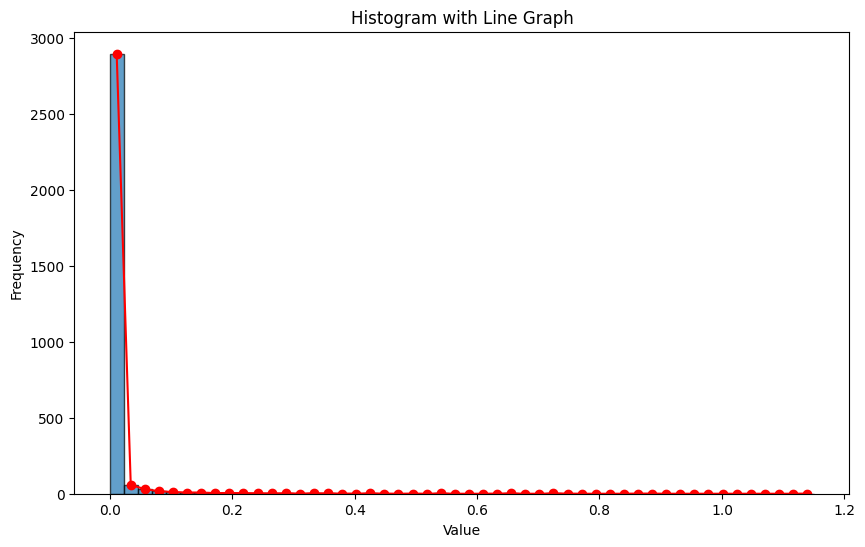

In [19]:
hist_with_line(np_data)